### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm

### Load the dataset and labels

In [2]:
labels = pd.read_csv("./label_data.csv", index_col=0)
data =  pd.read_csv("./feature_data.csv", index_col=0)

In [3]:
# add labels to data
def boll(x):
    if x == True:
        return 1
    else:
        return 0

data['cancelation']=labels['cancelation'].apply(boll)

# Exploration

In [4]:
# Quick look 
data.head(10)

,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,order_type,...,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13,cancelation
51014,309.0,2016,May,week_20,13,2,0.0,0,PRT,Offline TA/TO,...,0.0,215.0,0.0,0,0.0,0.250606,17.588299,True,1.0,1
28536,3.0,2016,October,week_41,2,2,0.0,0,ESP,Online TA,...,3.0,0.0,1.0,1,1.0,0.444719,2.343371,True,NaN,0
21745,NaN,2017,March,week_12,19,1,0.0,0,DEU,Direct,...,4.0,0.0,0.0,0,1.0,0.598733,2.498820,True,NaN,0
17502,153.0,2015,September,week_40,29,2,0.0,0,GBR,Offline TA/TO,...,3.0,0.0,0.0,0,1.0,0.335675,12.411559,True,NaN,0
83295,33.0,2016,January,week_5,25,2,0.0,0,BRA,Corporate,...,0.0,15.0,0.0,0,0.0,0.492874,5.743378,True,NaN,0
67872,50.0,2017,May,week_19,8,2,2.0,0,AGO,Online TA,...,5.0,0.0,0.0,0,0.0,0.297551,7.234509,True,NaN,1
21763,NaN,2016,March,week_11,9,1,0.0,0,PRT,Direct,...,0.0,0.0,0.0,0,1.0,0.514393,2.490639,True,NaN,0
16156,72.0,2015,NaN,week_33,9,2,0.0,0,NaN,Offline TA/TO,...,0.0,0.0,0.0,2,1.0,0.372214,8.449535,True,NaN,0
100645,180.0,2016,October,week_44,28,2,0.0,0,NaN,Offline TA/TO,...,0.0,0.0,0.0,2,0.0,0.427402,13.497397,True,NaN,0
95004,280.0,2016,August,week_33,12,2,2.0,0,GBR,Online TA,...,NaN,0.0,1.0,2,0.0,0.182388,16.723083,False,0.0,0


In [5]:
# Check shape
categoricals = [i for i in data.columns if data.dtypes[i] == 'object']
numericals = [i for i in data.columns if data.dtypes[i] != 'object']
data.shape

(89542, 34)

In [6]:
data['cancelation'].mean()

0.3707310535837931

In [7]:
# Check columns names and type
data.dtypes



time_until_order       float64
order_year               int64
order_month             object
order_week              object
order_day_of_month       int64
adults                   int64
children               float64
babies                   int64
country                 object
order_type              object
acquisition_channel     object
prev_canceled            int64
prev_not_canceled        int64
changes                float64
deposit_type            object
agent                  float64
company                float64
customer_type           object
adr                    float64
anon_feat_0            float64
anon_feat_1              int64
anon_feat_2              int64
anon_feat_3              int64
anon_feat_4              int64
anon_feat_5            float64
anon_feat_6            float64
anon_feat_7            float64
anon_feat_8              int64
anon_feat_9            float64
anon_feat_10           float64
anon_feat_11           float64
anon_feat_12              bool
anon_fea

We have 33 feature columns (26 numricals and 7 categoricals) and target variable cancelation which is binary.


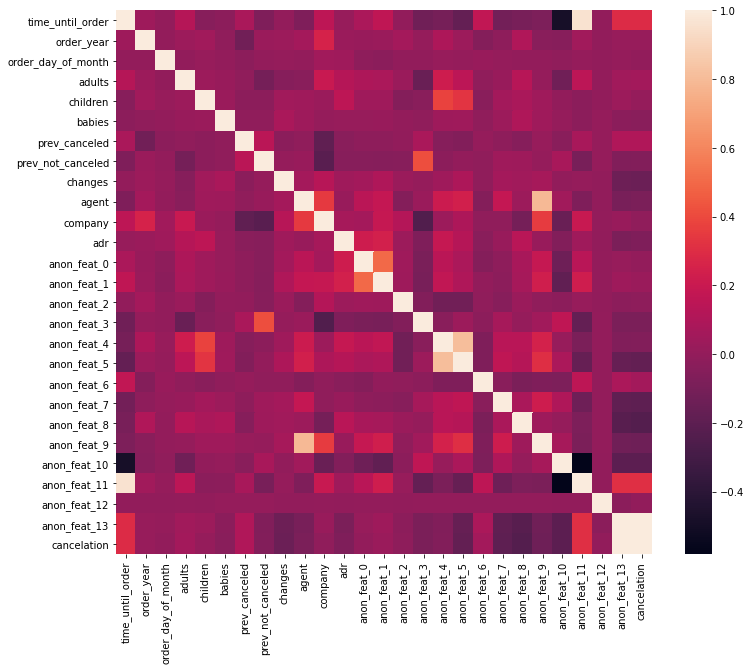

In [8]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), 
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)
plt.show()

In [9]:
#check high corr
#chek corr without cancelation

In [10]:
#check the summary statistics of the numerical columns 
data.describe()

,time_until_order,order_year,order_day_of_month,adults,children,babies,prev_canceled,prev_not_canceled,changes,agent,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_13,cancelation
count,76861.000000,89542.000000,89542.000000,89542.000000,89538.000000,89542.000000,89542.000000,89542.000000,86065.000000,77346.000000,...,89542.000000,85510.000000,85309.000000,85294.000000,89542.000000,85811.000000,86810.000000,84585.000000,5776.000000,89542.000000
mean,103.673879,2016.157658,15.828807,1.857497,0.103732,0.007896,0.087411,0.137701,0.223877,86.731647,...,0.989971,1.330944,2.339401,0.062607,0.571922,0.335691,0.427146,8.845679,0.365132,0.370731
std,106.940156,0.707461,8.779753,0.565296,0.397797,0.095194,0.849799,1.496269,0.663361,110.808075,...,1.698086,1.879927,17.516854,0.243415,0.793567,0.472234,0.128140,5.236673,0.481509,0.483003
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161008,0.038632,0.000000,0.000000
25%,18.000000,2016.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328012,4.452191,0.000000,0.000000
50%,69.000000,2016.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425622,8.422255,0.000000,0.000000
75%,159.000000,2017.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,...,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.511077,12.712815,1.000000,1.000000
max,737.000000,2017.000000,31.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,...,9.000000,11.000000,391.000000,3.000000,5.000000,1.000000,0.907525,27.172399,1.000000,1.000000


#### Quick observations
* 37 % of the people have cancelled their order.
* Median lead time is 69 days.
* Avg. lead time is 103.6 days, around 3.5 months.
* Each order has on an average 1.8 adults and 0.1 children.
* Each prder has on an average 0.22 changes



In [11]:
data.groupby(['order_year'])['cancelation'].mean()

order_year
2015    0.372494
2016    0.358603
2017    0.386638
Name: cancelation, dtype: float64

* Cancellation rates have remain almost consistent in all 3 years around 36-38%.

Total bookings canceled: 33,196 (37 %)


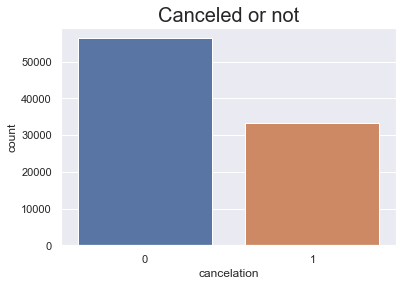

In [12]:
sns.set(style = "darkgrid")
plt.title("Canceled or not", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "cancelation", data = data)


total_cancelations = data["cancelation"].sum()
per_cancel = total_cancelations / data.shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({per_cancel:.0f} %)")

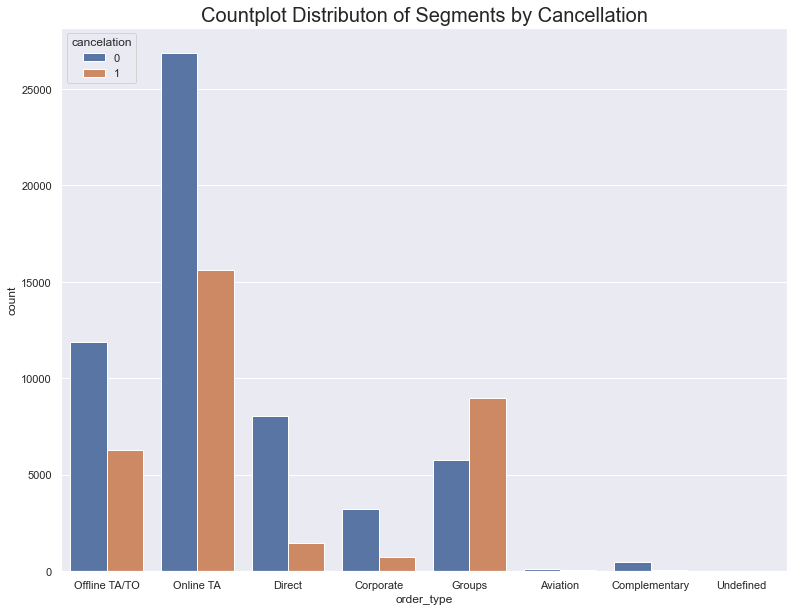

In [13]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "order_type", hue = 'cancelation', data = data)

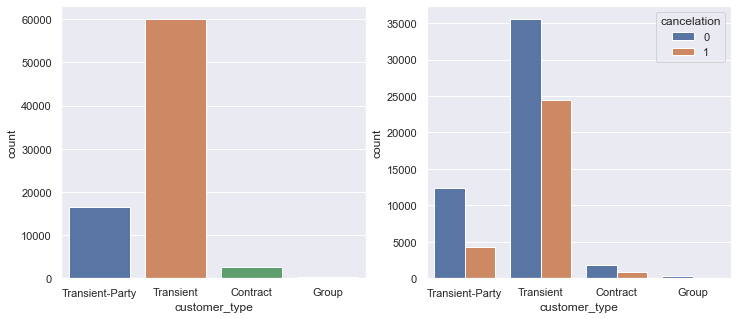

In [14]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'customer_type', data = data, ax = ax[0])
sns.countplot(x = 'customer_type', data = data, hue = 'cancelation', ax = ax[1])
plt.show()

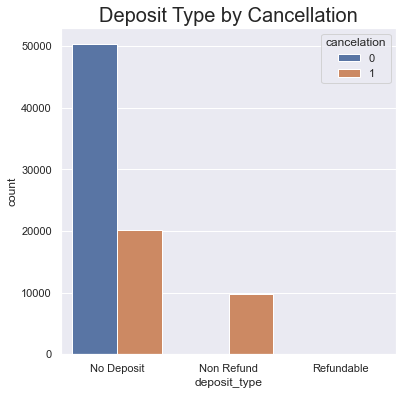

In [15]:
plt.figure(figsize = (6,6))
sns.set(style = "darkgrid")
plt.title("Deposit Type by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "deposit_type", hue = 'cancelation', data = data)

* Deposit type has 3 categories - No Deposit, refundable, Non Refund
* All of the non refund bookings have been cancelled in our dataset.

Text(0.5, 1.0, 'Density Curve of time until order by Cancelation')

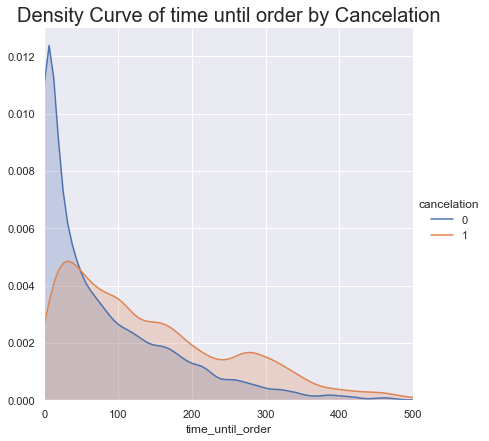

In [16]:
(sns.FacetGrid(data, hue = 'cancelation',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'time_until_order', shade = True)
    .add_legend());
plt.title("Density Curve of time until order by Cancelation", fontdict = {'fontsize':20})

we can see that cancellation rate is higher after roughly 60, so we can say people tend to cancel their reservations while time is more than it.

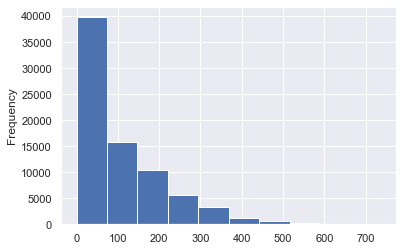

(51.7 %) of orders are in 100 days.


In [17]:
data['time_until_order'].plot.hist()
plt.show()
print(f"({(data[data['time_until_order']<100].shape[0]/data.shape[0])*100:.1f} %) of orders are in 100 days.")

## formating num to 2/3 num after point

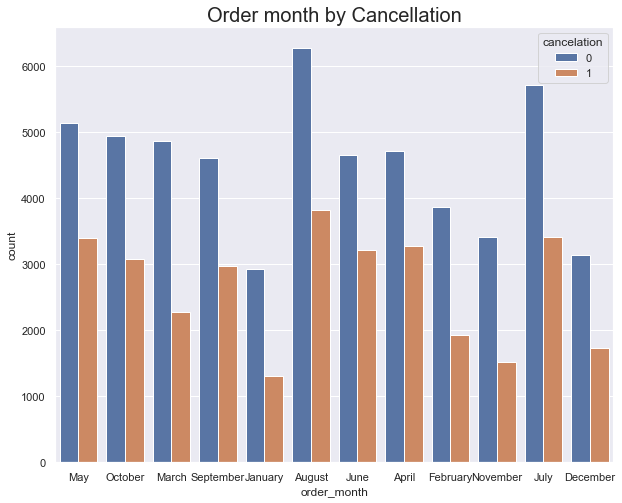

In [18]:
plt.figure(figsize = (10,8))
sns.set(style = "darkgrid")
plt.title("Order month by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "order_month", hue = 'cancelation', data = data)

more then half of the orders are in 100 days.

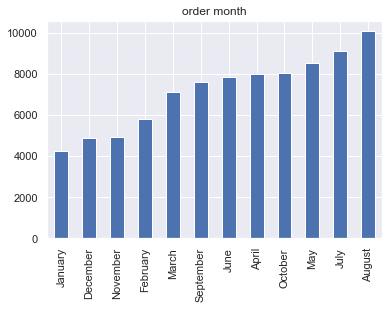

In [19]:
data['order_month'].value_counts().sort_values().plot(kind = 'bar')
plt.title('order month')
plt.show()

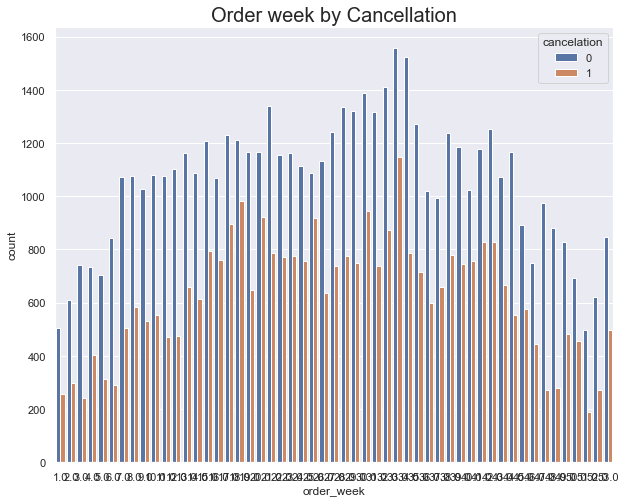

In [20]:
data['order_week'] = data['order_week'].str.replace('week_','').astype(float)
plt.figure(figsize = (10,8))
sns.set(style = "darkgrid")
plt.title("Order week by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "order_week", hue = 'cancelation', data = data)

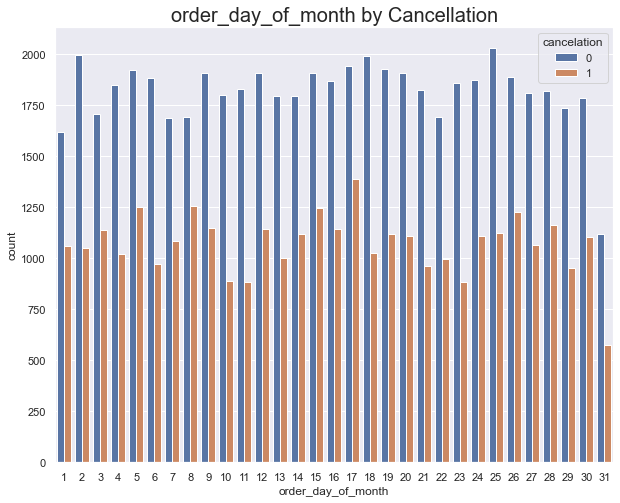

In [21]:
plt.figure(figsize = (10,8))
sns.set(style = "darkgrid")
plt.title("order_day_of_month by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "order_day_of_month", hue = 'cancelation', data = data)

we can see summer mounts are with most orders

						Order per country


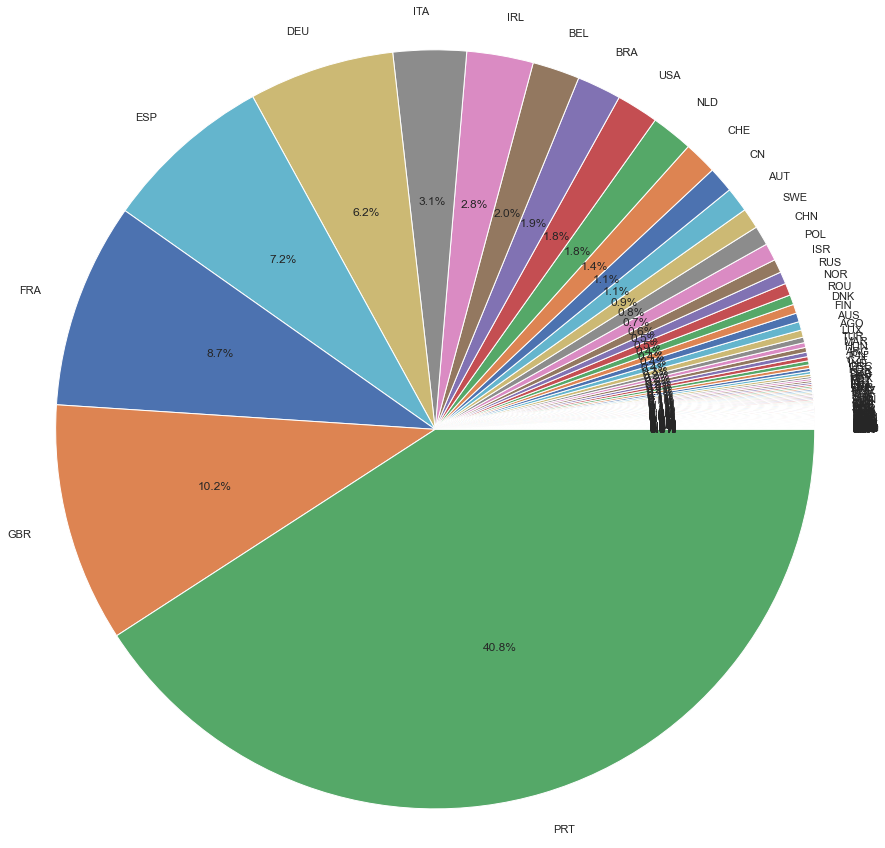

In [22]:
print("\t\t\t\t\t\tOrder per country")
country_data = data['country'].value_counts().sort_values()
my_labels = data['country'].value_counts().sort_values().index  
plt.figure(figsize=(15,15))
plt.pie(country_data,labels=my_labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# preproccessing
### (Outliers, Standardization, Missing Values, Dimensions, Feature Engineering and Test Processing)

In [23]:
num_of_sampels_before_removing = data.shape[0]

### missing values

In [24]:
# check for missing values
print("# of NaN in each columns:", data.isnull().sum(), sep='\n')

# of NaN in each columns:
time_until_order       12681
order_year                 0
order_month             3434
order_week                 0
order_day_of_month         0
adults                     0
children                   4
babies                     0
country                 4341
order_type                 0
acquisition_channel        0
prev_canceled              0
prev_not_canceled          0
changes                 3477
deposit_type            9006
agent                  12196
company                84480
customer_type           9895
adr                     2983
anon_feat_0             3381
anon_feat_1                0
anon_feat_2                0
anon_feat_3                0
anon_feat_4                0
anon_feat_5             4032
anon_feat_6             4233
anon_feat_7             4248
anon_feat_8                0
anon_feat_9             3731
anon_feat_10            2732
anon_feat_11            4957
anon_feat_12               0
anon_feat_13           83766
cancelation      

In [25]:
##remove 2 columns with most null, even anon_feat_13 had very good corr
# We have 3434 missing values in order_mount column. we will dropp this column and work with order_week 
# drop agent because 
data.drop(columns=['company', 'anon_feat_13','order_month','agent'],inplace=True)  

In [26]:
data[data.isnull().sum(axis=1)>4].shape[0]  ##chek how many samples are with X null varibles

59

In [27]:
data.drop(data[data.isnull().sum(axis=1)>4].index, inplace = True)

In [28]:
# Replace missing values:

# We have 4 missing values in children column. If there is no information about children, we will fill 0.
# country as unknoown
# deposit_type and customer_type as the majority

nan_replacement_dict = {"children": 0 ,"country" : "UKNWN", "deposit_type" : "No_Deposit", "customer_type" : "Transient"}
data.fillna(nan_replacement_dict, inplace = True)
numericals = numeric_columns = data.select_dtypes(include=['number']).columns
data[numericals] = data[numericals].apply(lambda x: x.fillna(0),axis=0)  ## or by mean

In [29]:
data.isnull().sum()

time_until_order       0
order_year             0
order_week             0
order_day_of_month     0
adults                 0
children               0
babies                 0
country                0
order_type             0
acquisition_channel    0
prev_canceled          0
prev_not_canceled      0
changes                0
deposit_type           0
customer_type          0
adr                    0
anon_feat_0            0
anon_feat_1            0
anon_feat_2            0
anon_feat_3            0
anon_feat_4            0
anon_feat_5            0
anon_feat_6            0
anon_feat_7            0
anon_feat_8            0
anon_feat_9            0
anon_feat_10           0
anon_feat_11           0
anon_feat_12           0
cancelation            0
dtype: int64

In [30]:
num_of_sampels_removing = num_of_sampels_before_removing - data.shape[0]
print(f"in total, removed {num_of_sampels_removing:.0f} samples, which are only: {num_of_sampels_removing/num_of_sampels_before_removing*100:.4f}%")


in total, removed 59 samples, which are only: 0.0659%


### Outliers

In [31]:
num_of_sampels_before_removing = data.shape[0]
num_of_sampels_before_removing

89483

In [32]:
print(data['adults'].value_counts())
print(f"{((data[data['adults']>4].shape[0]/data.shape[0])*100):.4f} % of orders are more than 4 adults")
print("only " + str((data[data['adults']>4].shape[0])) + " of orders are more than 4 adults")

2     67321
1     17145
3      4672
0       289
4        47
26        3
55        1
50        1
20        1
10        1
6         1
5         1
Name: adults, dtype: int64
0.0101 % of orders are more than 4 adults
only 9 of orders are more than 4 adults


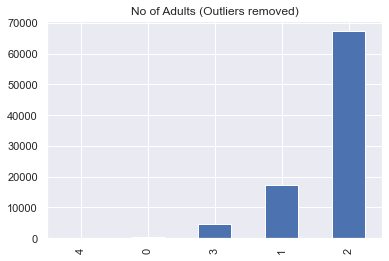

In [33]:
data=data.loc[(data['adults']<=4)]
data['adults'].value_counts().sort_values().plot(kind='bar')
plt.title('No of Adults (Outliers removed)')
plt.show()

In [34]:
data.shape[0]

89474

In [35]:
print(data['children'].value_counts())
print(f"{((data[data['children']>3].shape[0]/data.shape[0])*100):.4f} % of orders are more than 3 children")
print("only " + str((data[data['children']>3].shape[0])) + " of orders are more than 3 children")

0.0     83021
1.0      3690
2.0      2706
3.0        56
10.0        1
Name: children, dtype: int64
0.0011 % of orders are more than 3 children
only 1 of orders are more than 3 children


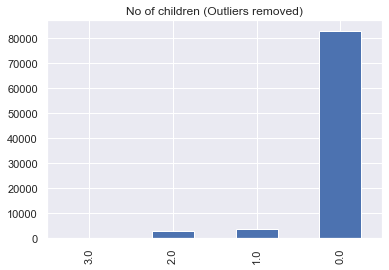

In [36]:
data=data.loc[(data['children']<4)]
data['children'].value_counts().sort_values().plot(kind='bar')
plt.title('No of children (Outliers removed)')
plt.show()

In [37]:
data.shape[0]

89473

In [38]:
data['country'].value_counts().sort_values()

PYF        1
GUY        1
SDN        1
FJI        1
UMI        1
       ...  
DEU     5278
ESP     6165
FRA     7445
GBR     8673
PRT    34780
Name: country, Length: 164, dtype: int64

In [39]:
data =  data[~data['country'].isin(list((country_data[country_data<21]).index))]
print(f"{((country_data[country_data<21].shape[0]/data.shape[0])*100):.4f} % of orders are from countries eith 20 orders or less")
print("only " + str((country_data[country_data<21].sum())) + " of orders are from countries eith 20 orders or less")

0.1091 % of orders are from countries eith 20 orders or less
only 553 of orders are from countries eith 20 orders or less


In [40]:
data['country'].value_counts().sort_values()

BLR       21
ECU       21
EGY       22
NGA       23
IDN       25
       ...  
DEU     5278
ESP     6165
FRA     7445
GBR     8673
PRT    34780
Name: country, Length: 67, dtype: int64

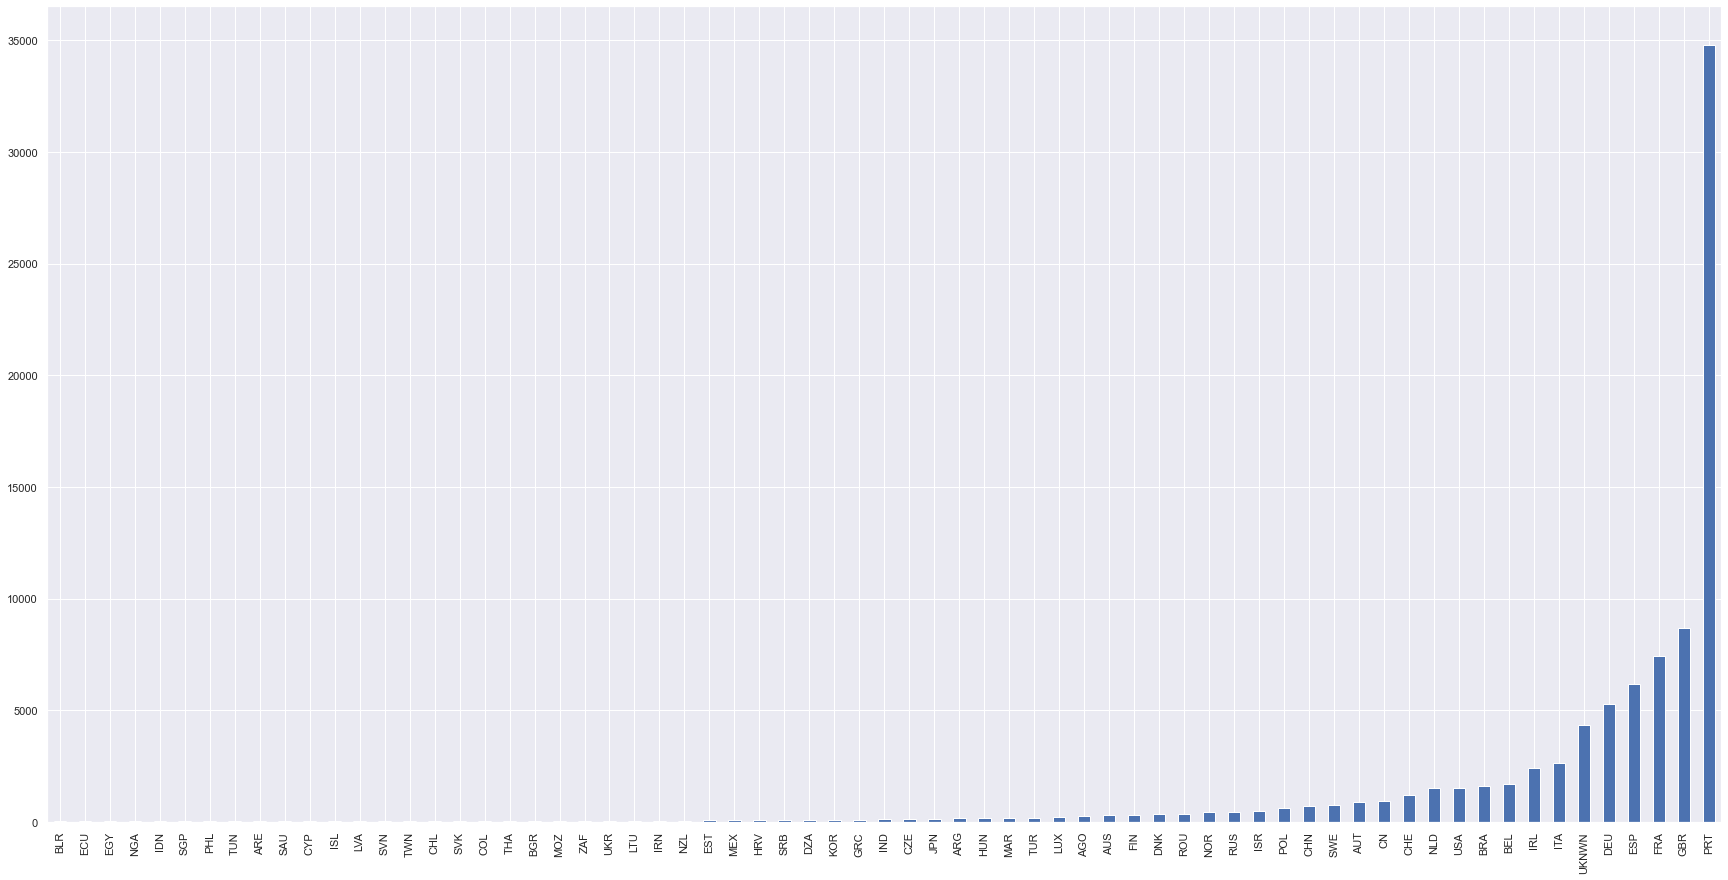

In [41]:
plt.figure(figsize=(30,15))
data['country'].value_counts().sort_values().plot(kind='bar')
plt.show()
# print(data['country'].value_counts())


In [42]:
print("Num of sampels *before* removing outliers:" + str(num_of_sampels_before_removing))
print("Num of sampels *after* removing outliers:" + str(data.shape[0]))
num_of_sampels_removing = num_of_sampels_before_removing - data.shape[0]
print(f"in total, removed {num_of_sampels_removing:.0f} samples, which are only: {num_of_sampels_removing/num_of_sampels_before_removing*100:.4f}%")


Num of sampels *before* removing outliers:89483
Num of sampels *after* removing outliers:88920
in total, removed 563 samples, which are only: 0.6292%


In [43]:
data.groupby(['country'])['cancelation'].agg( np.mean).sort_values(ascending = False).head(20)

country
ARE    0.833333
PHL    0.750000
NGA    0.695652
SAU    0.666667
IDN    0.600000
AGO    0.580153
PRT    0.567223
TUN    0.551724
CHN    0.457746
ZAF    0.450980
TUR    0.417143
COL    0.416667
EGY    0.409091
MAR    0.408046
SGP    0.407407
RUS    0.393665
SVK    0.382979
LUX    0.378109
BRA    0.376324
HUN    0.365854
Name: cancelation, dtype: float64

These are the top 30 countries out of 177 countries with mean cancellation rate > 36%.

### Feature Engineering

In [44]:
def family(data):
    if ((data['adults'] > 0) & ((data['children'] > 0) or (data['babies'] > 0))):
        val = 1
    else:
        val = 0
    return val
                                
def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') or (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1                       

def summer(data):
    if (data['order_week'] > 22 or data['order_week'] < 40):
        val = 1
    else:
        val = 0
    return val

def changes(data):
    if (data['changes'] > 0):
        val = 1
    else:
        val = 0
    return val
                                
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["is_summer"] = data.apply(summer, axis = 1)
    data["is_changes"] = data.apply(changes, axis = 1) 
    data["children ** 3"] = data["children"] * data["children"] * data["children"]
    return data

data = feature(data)

In [45]:
data.head()

,time_until_order,order_year,order_week,order_day_of_month,adults,children,babies,country,order_type,acquisition_channel,...,anon_feat_10,anon_feat_11,anon_feat_12,cancelation,is_family,total_customer,deposit_given,is_summer,is_changes,children ** 3
51014,309.0,2016,20.0,13,2,0.0,0,PRT,Offline TA/TO,TA/TO,...,0.250606,17.588299,True,1,0,2.0,0,1,0,0.0
28536,3.0,2016,41.0,2,2,0.0,0,ESP,Online TA,TA/TO,...,0.444719,2.343371,True,0,0,2.0,1,1,0,0.0
21745,0.0,2017,12.0,19,1,0.0,0,DEU,Direct,Direct,...,0.598733,2.498820,True,0,0,1.0,0,1,0,0.0
17502,153.0,2015,40.0,29,2,0.0,0,GBR,Offline TA/TO,TA/TO,...,0.335675,12.411559,True,0,0,2.0,0,1,1,0.0
83295,33.0,2016,5.0,25,2,0.0,0,BRA,Corporate,Corporate,...,0.492874,5.743378,True,0,0,2.0,0,1,1,0.0


### Dimensions

In [46]:
#LabelEncoder
le = LabelEncoder()
data['country'] = le.fit_transform(data['country'])

In [47]:
#add bar plot with corr  -- plot all toghter in the same plot


# for col in data:
#     plt.scatter(data[col],data['cancelation'])
#     plt.show()

### Feature selection

In [48]:
data.columns

Index(['time_until_order', 'order_year', 'order_week', 'order_day_of_month',
       'adults', 'children', 'babies', 'country', 'order_type',
       'acquisition_channel', 'prev_canceled', 'prev_not_canceled', 'changes',
       'deposit_type', 'customer_type', 'adr', 'anon_feat_0', 'anon_feat_1',
       'anon_feat_2', 'anon_feat_3', 'anon_feat_4', 'anon_feat_5',
       'anon_feat_6', 'anon_feat_7', 'anon_feat_8', 'anon_feat_9',
       'anon_feat_10', 'anon_feat_11', 'anon_feat_12', 'cancelation',
       'is_family', 'total_customer', 'deposit_given', 'is_summer',
       'is_changes', 'children ** 3'],
      dtype='object')

In [49]:
# #unselct order_week order_day_of_month, children, anon_feat_12,anon_feat_0, is_summer
# data = data[['time_until_order', 'order_year',
#        'adults', 'babies', 'country', 'order_type',
#        'acquisition_channel', 'prev_canceled', 'prev_not_canceled', 'changes',
#        'deposit_type', 'customer_type', 'adr', 'anon_feat_1',
#        'anon_feat_2', 'anon_feat_3', 'anon_feat_4', 'anon_feat_5',
#        'anon_feat_6', 'anon_feat_7', 'anon_feat_8', 'anon_feat_9',
#        'anon_feat_10', 'anon_feat_11', 'cancelation', 
#     'is_family', 'total_customer', 'deposit_given', 'is_changes', 'children ** 3']]


In [50]:
cor = data.corr()
abs(cor)
cor[cor>0.6]

,time_until_order,order_year,order_week,order_day_of_month,adults,children,babies,country,prev_canceled,prev_not_canceled,...,anon_feat_10,anon_feat_11,anon_feat_12,cancelation,is_family,total_customer,deposit_given,is_summer,is_changes,children ** 3
time_until_order,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.768081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_year,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_week,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_day_of_month,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adults,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.777359,NaN,NaN,NaN,NaN
children,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.874029,0.642154,NaN,NaN,NaN,0.897460
babies,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prev_canceled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prev_not_canceled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Standardization

In [51]:
# #standartization
# # We initialize our scaler
# standard_scaler = StandardScaler()
# # We fit our scaler
# standard_scaler.fit(data)
# # We transform our X using the scaler we have just fit.
# df=standard_scaler.transform(data)

numericals = [i for i in data.columns if data.dtypes[i] != 'object']
from sklearn.preprocessing import MinMaxScaler
# We initialize our scaler
min_max_scaler = MinMaxScaler()
# We fit our scaler
min_max_scaler.fit(data[numericals])
# We transform our X using the scaler we have just fit.
scaled_data =min_max_scaler.transform(data[numericals])


In [52]:
data[numericals] = scaled_data

In [53]:
#one hot encoding 
categoricals = [i for i in data.columns if data.dtypes[i] == 'object']
data = pd.get_dummies(data = data, columns = categoricals, drop_first = True)

In [54]:
cancel_corr = data.corr()["cancelation"]
cancel_corr.abs().sort_values(ascending=False)[1:]

deposit_type_Non Refund          0.455919
deposit_given                    0.345171
anon_feat_11                     0.292409
time_until_order                 0.254745
country                          0.235834
anon_feat_8                      0.235154
order_type_Groups                0.221783
anon_feat_7                      0.192779
is_changes                       0.183116
acquisition_channel_TA/TO        0.176063
anon_feat_10                     0.173319
anon_feat_5                      0.171734
order_type_Direct                0.155425
acquisition_channel_Direct       0.152022
changes                          0.141649
anon_feat_9                      0.132107
customer_type_Transient          0.122140
customer_type_Transient-Party    0.114333
prev_canceled                    0.110205
anon_feat_3                      0.085625
order_type_Corporate             0.081350
adr                              0.070200
anon_feat_4                      0.061963
adults                           0

In [55]:
sel = list(cancel_corr.abs().sort_values(ascending=False)[1:].index[:35])

In [56]:
# Lets separate training and target dataset
X = data.drop('cancelation', axis = 1)
y = data['cancelation']

In [57]:
X = X[sel]

In [58]:
X.shape

(88920, 35)

In [59]:
X

,deposit_type_Non Refund,deposit_given,anon_feat_11,time_until_order,country,anon_feat_8,order_type_Groups,anon_feat_7,is_changes,acquisition_channel_TA/TO,...,anon_feat_6,total_customer,customer_type_Group,order_type_Complementary,babies,anon_feat_1,order_type_Offline TA/TO,anon_feat_2,acquisition_channel_GDS,order_year
51014,0,0.0,0.647285,0.419267,0.757576,0.0,0,0.000000,0.0,1,...,0.549872,0.166667,0,0,0.0,0.04,1,0.5,0,0.5
28536,0,1.0,0.086241,0.004071,0.318182,0.2,0,0.333333,0.0,1,...,0.000000,0.166667,0,0,0.0,0.04,0,0.0,0,0.5
21745,0,0.0,0.091962,0.000000,0.242424,0.0,0,0.000000,0.0,0,...,0.000000,0.083333,0,0,0.0,0.04,0,0.5,0,1.0
17502,0,0.0,0.456771,0.207598,0.378788,0.0,0,0.000000,1.0,1,...,0.000000,0.166667,0,0,0.0,0.20,1,0.5,0,0.0
83295,0,0.0,0.211368,0.044776,0.121212,0.0,0,0.000000,1.0,0,...,0.038363,0.166667,0,0,0.0,0.04,0,0.0,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112553,0,0.0,0.171639,0.028494,0.136364,0.2,0,0.000000,0.0,1,...,0.000000,0.166667,0,0,0.0,0.04,0,0.0,0,1.0
87372,0,0.0,0.349114,0.122117,0.242424,0.2,0,0.000000,0.0,1,...,0.000000,0.166667,0,0,0.0,0.06,0,0.0,0,0.5
16490,0,0.0,0.229844,0.052917,0.757576,0.2,0,0.000000,0.0,1,...,0.000000,0.083333,0,0,0.0,0.10,0,0.0,0,0.0
1185,0,0.0,0.383156,0.149254,0.757576,0.2,0,0.000000,0.0,1,...,0.000000,0.166667,0,0,0.0,0.10,0,0.0,0,0.0


In [60]:
y

51014     1.0
28536     0.0
21745     0.0
17502     0.0
83295     0.0
         ... 
112553    0.0
87372     0.0
16490     0.0
1185      1.0
112878    0.0
Name: cancelation, Length: 88920, dtype: float64

### PCA

In [61]:
# initialize PCA
pca = PCA(n_components=20)
# Fit the model with the data
pca.fit(X)
# apply the PCA on the data (or on new data)
X_pca = pca.transform(X)
# Percentage of variance explained by each of the selected components (used for plotting also)
print("The explained variance ratio")
print(pca.explained_variance_ratio_)
print("sum:", pca.explained_variance_ratio_.sum())
# See the components
print("\nThe new components")
pd.DataFrame(pca.components_)

The explained variance ratio
[0.18427503 0.15348931 0.12414368 0.0940168  0.08115865 0.05775244
 0.05180019 0.0394921  0.03341376 0.03084236 0.0242434  0.02066659
 0.01886473 0.01381875 0.01238233 0.00902796 0.00826627 0.00742586
 0.00618696 0.00589119]
sum: 0.9771583740548203

The new components


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.202366,-0.245060,-0.135070,-0.085997,-0.031641,0.051809,-0.275452,0.028077,0.072173,-0.399390,...,-0.011193,0.010276,-0.000137,0.012693,0.000963,0.002610,-0.235300,-0.023637,0.001763,0.099675
1,-0.196532,-0.248514,-0.023669,-0.011216,0.011180,-0.023740,0.121170,0.010586,0.177009,-0.275760,...,0.002036,-0.012412,0.006347,0.003555,0.000393,0.000632,0.006014,0.003589,-0.000471,-0.141105
2,0.400072,0.543649,0.055495,0.052493,0.174401,-0.085716,0.412896,0.000364,-0.024346,-0.353252,...,0.006398,-0.013144,-0.002689,0.007631,-0.000196,-0.010079,-0.187397,-0.083033,0.000123,-0.081131
3,0.121375,0.185848,0.053740,0.035477,0.087746,-0.020323,0.076598,0.022468,-0.025341,0.144613,...,-0.000380,0.004861,0.000647,-0.008369,0.000424,0.020052,0.185022,-0.020639,-0.003599,-0.109601
4,0.081124,0.146092,-0.024303,-0.012629,0.080198,-0.065012,-0.411564,-0.003157,-0.051694,-0.163900,...,0.007499,-0.012805,0.005163,0.004933,0.000265,0.000481,0.789131,-0.061260,0.001597,-0.230186
5,0.065335,0.176069,0.135249,0.084677,-0.089905,0.010483,-0.029865,-0.000139,0.684411,0.021255,...,0.002253,0.006577,-0.001134,-0.005267,0.001727,0.012663,0.192487,0.102202,-0.000547,0.628104
6,-0.001497,-0.017561,-0.071245,-0.044643,0.078104,0.013491,0.014127,0.009914,0.691682,0.051214,...,-0.000734,-0.004540,-0.000972,0.006712,0.002272,-0.002572,-0.107457,-0.036412,-0.000819,-0.644278
7,0.007777,0.106265,-0.218702,-0.125801,0.262249,-0.041008,-0.177446,0.005247,0.025657,-0.281211,...,-0.005835,-0.060300,0.006310,0.018636,-0.001023,-0.021959,-0.046615,-0.235839,0.006628,0.229105
8,0.008373,-0.040602,-0.086237,-0.050682,0.097652,-0.059899,0.050193,-0.012256,-0.027911,-0.107628,...,-0.001051,-0.050945,-0.003849,0.003133,-0.000479,-0.008078,0.042047,0.871766,0.006810,-0.026890
9,-0.149703,0.612441,-0.154531,-0.108524,-0.335801,0.138365,-0.441647,0.018038,-0.033931,0.066917,...,-0.010004,0.025967,0.007126,-0.004618,0.000321,0.000105,-0.276176,0.211062,-0.002361,-0.108043


In [62]:
# explained_variance_ratio = pca.explained_variance_ratio_
# bar_1 = plt.bar(x=["PC0", "PC1"],height=explained_variance_ratio)
# plt.show()

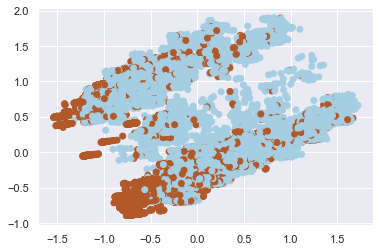

In [63]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

### Test Processing

# Data Modelling

In [64]:
#Splitting them further into training and test set
X_train,  X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [65]:
import time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC





In [66]:
model_dict = {
    'KNN_Model' : KNeighborsClassifier(),
    'LOR_Model' : LogisticRegression(n_jobs = -1),
    #'MLPClassifier': MLPClassifier(),
    'RFC_Model' : RandomForestClassifier(n_jobs = -1),
    'Tree': DecisionTreeClassifier(),
    }

In [67]:
#Function to train the respective algorithm with the train data and printing out accuracy score and confusion matrix
def model1(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    
    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))

In [68]:
def ROC(y_test, y_prob, clfname):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (5,5))
    plt.title('ROC for ' + clfname)
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    



KNN_Model 

Accuracy Score: 0.8121907332433648

Confusion Matrix:
 [[9631 1487]
 [1853 4813]]
folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


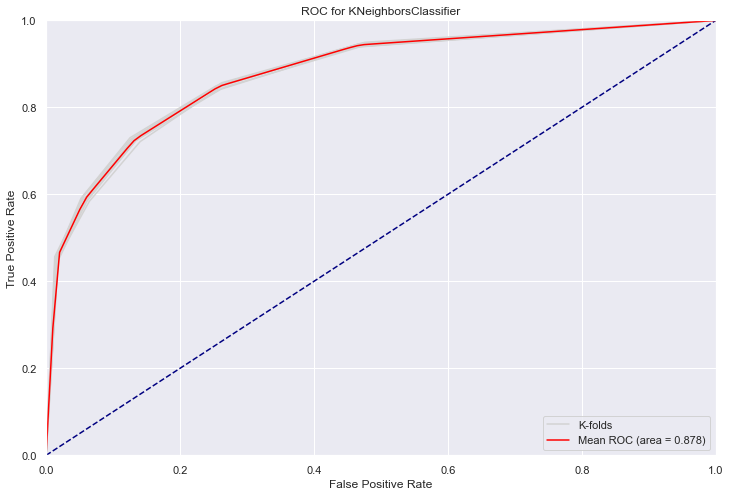



LOR_Model 

Accuracy Score: 0.7945906432748538

Confusion Matrix:
 [[10047  1071]
 [ 2582  4084]]
folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


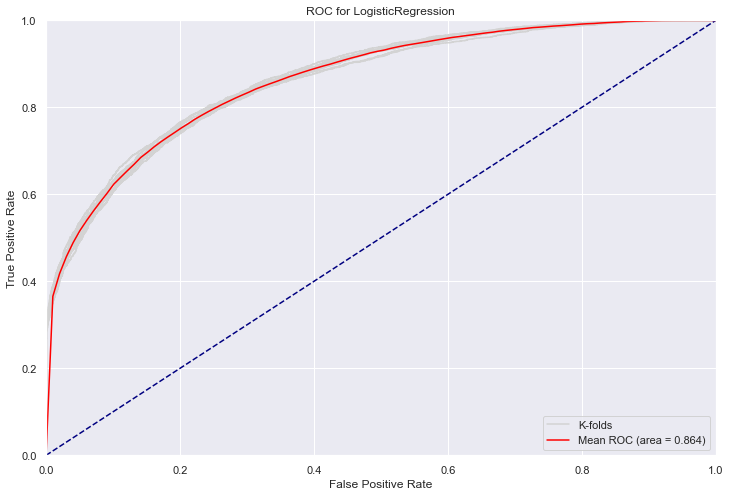



RFC_Model 

Accuracy Score: 0.8621232568600989

Confusion Matrix:
 [[10322   796]
 [ 1656  5010]]
folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


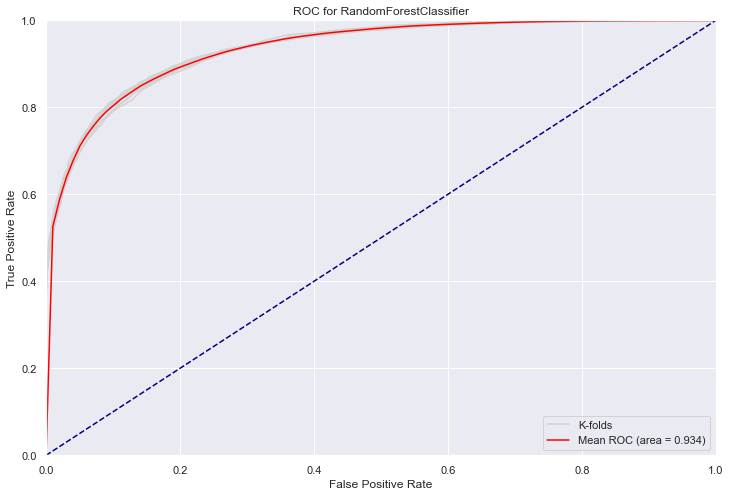



Tree 

Accuracy Score: 0.8002136752136753

Confusion Matrix:
 [[9303 1815]
 [1738 4928]]
folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


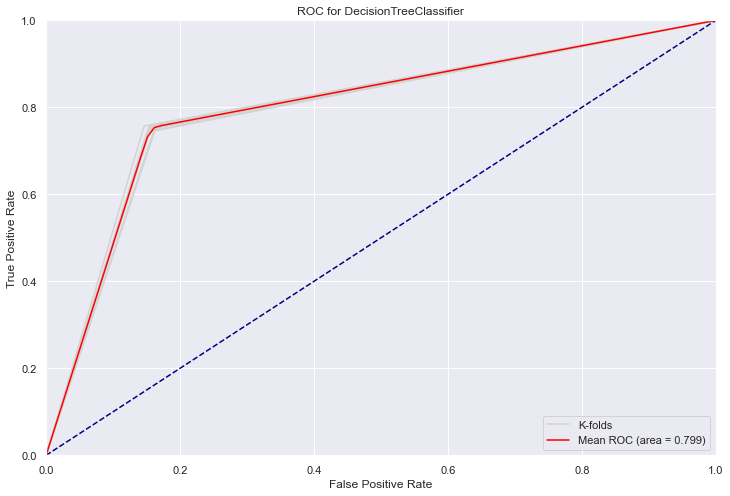

In [86]:
for name, model in model_dict.items():
    print("\n")
    print(name, "\n")
    model1(model, X_train, X_test, y_train, y_test )
    #ROC(y_test, y_prob, name)
    KfoldPlot(np.array(X), np.array(y), model, 10)
    
    

0.9475028636584835


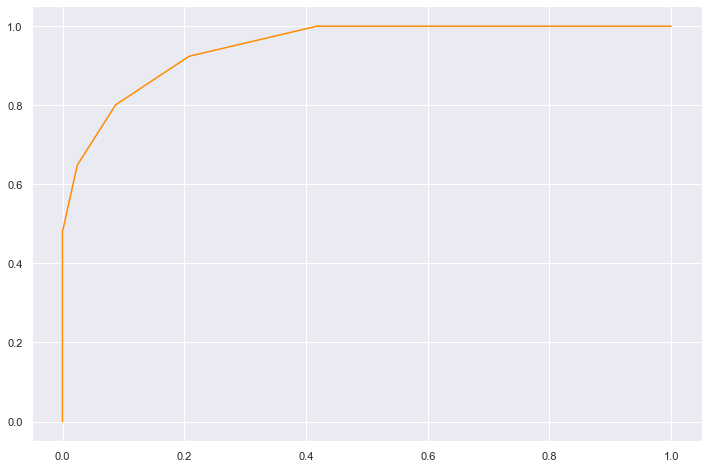

In [79]:
#The prediction we want to test against are the probability of 1 of the x[test_index]

# bootstrap= True, max_depth= 18, max_features= 4, min_samples_leaf= 2, min_samples_split= 8, n_estimators= 140
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_train)[:,1]
  
#get the roc curve on the specific fold and save it to the dictionaries
fpr, tpr, _ = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)
        
#plot the current fold
plt.plot(fpr, tpr, color='darkorange') #The ROC curve of the train

print(auc(fpr, tpr))



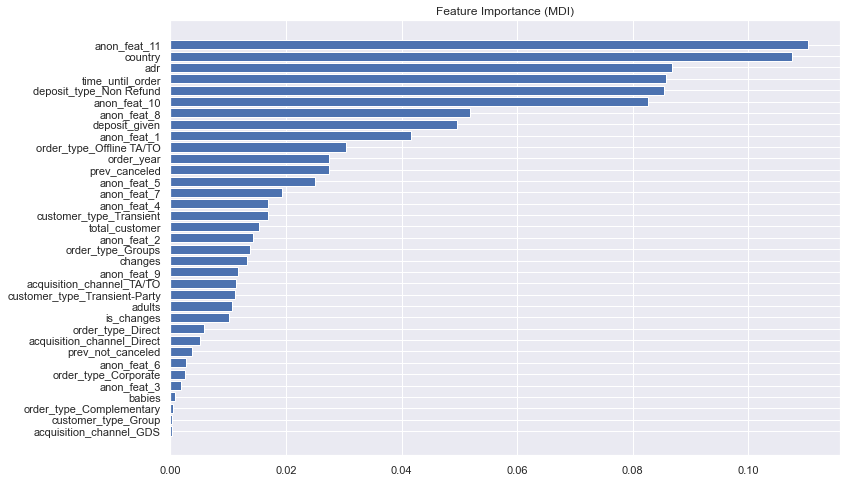

In [71]:
plt.rcParams["figure.figsize"] = (12,8)
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

No handles with labels found to put in legend.


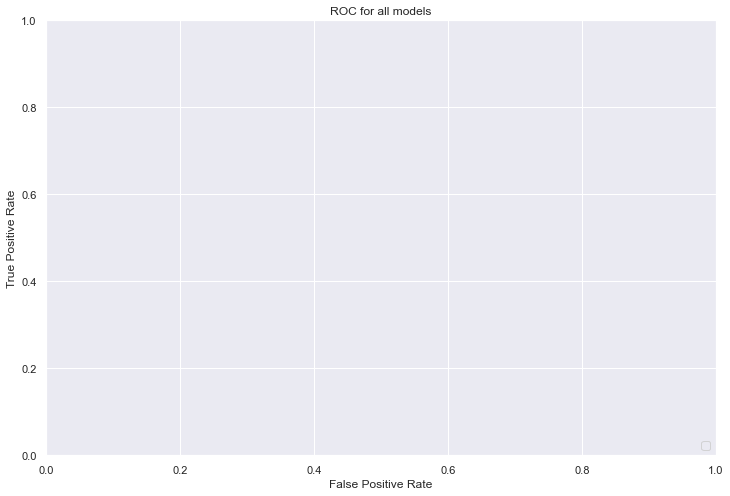

In [92]:
from numpy import interp
def KfoldPlot(X, y, model_dict, k):
    colors_d = ['red', 'blue','orange', 'green']
    c=0
    #We prepare a figure, which will be filled in with some graphs inside.
    plt.figure()
    #We initialize the KFOLD, which will be iterated later.
    kf = KFold(n_splits=k, shuffle=False)
    
    for name, clf in model_dict.items():
        print("\n")
        print(name, "\n")

        #str(clf) returns the name of the classifier, we set this as the title.
        clfname = str(clf)[:str(clf).find("(")]

        #Since we need to interpolate data, we set an mean tpr and fpr for later porpuses.
        mean_tpr = 0.0
        mean_fpr = np.linspace(0, 1, 100)

        i=1
        #We iterate over the folds.
        for train_index, validation_index in kf.split(X):

            #Just printing the current fold
            print("folding No. ", i)

            #Splitting into train and validation, based on the current fold.
            X_train, X_validation = X[train_index], X[validation_index]
            y_train, y_validation = y[train_index], y[validation_index]

            #We fit with X_train and y_train.
            clf.fit(X_train, y_train)

            #The prediction we want to test against are the probability of 1 of the X_test
            prob_prediction = clf.predict_proba(X_validation)[:, 1]

            #Right now we can set our ROC curve on the specific fold.
            fpr, tpr, thresholds = roc_curve(y_validation, prob_prediction)

            #We interpolate the mean_tpr so all of the classifiers will be working under the same thersholds.
            mean_tpr += interp(mean_fpr, fpr, tpr)
            mean_tpr[0] = 0.0

            #We plot the current fold with the color #D3D3D3
            plt.plot(fpr, tpr, color='#D3D3D3')
            i+=1

        plt.plot([0], [0], color='#D3D3D3', linestyle='-', label='K-folds')    


        #Right now the mean_tpr is a sum (we added each iteration, so we finally divide by the number of folds)
        mean_tpr /= k
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)

        #After all of the iterations, we plot the random-guess line
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

        #And we plot the mean roc, the red line should be in the middle of all gray lines.
        plt.plot(mean_fpr, mean_tpr, color=colors_d[c], linestyle='-', label='Mean ROC (area = %0.3f)' % mean_auc)
        c+=1

#Setting some boundaries and adding a legend... nothing special.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for all models')
plt.legend(loc="lower right")
plt.show()



KNN_Model 

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


LOR_Model 

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


RFC_Model 

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


Tree 

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


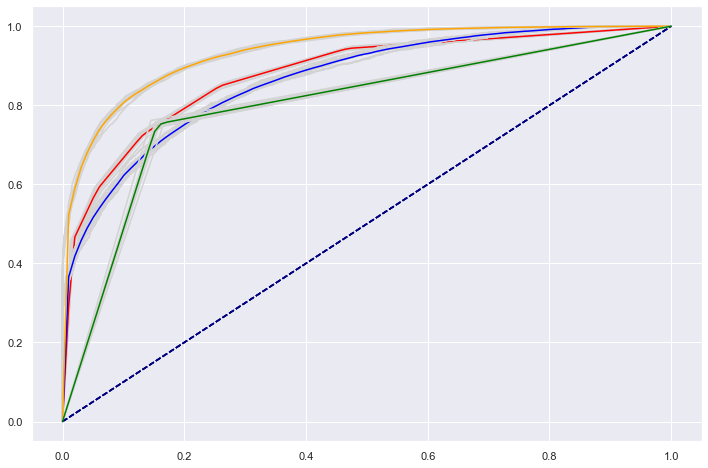

In [93]:
KfoldPlot(np.array(X), np.array(y) ,model_dict, 10)

In [84]:
# fit tree
clf = RandomForestClassifier(criterion='entropy',
                             splitter='best',
                             max_depth=3,
                             min_samples_split=2)
clf.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'splitter'

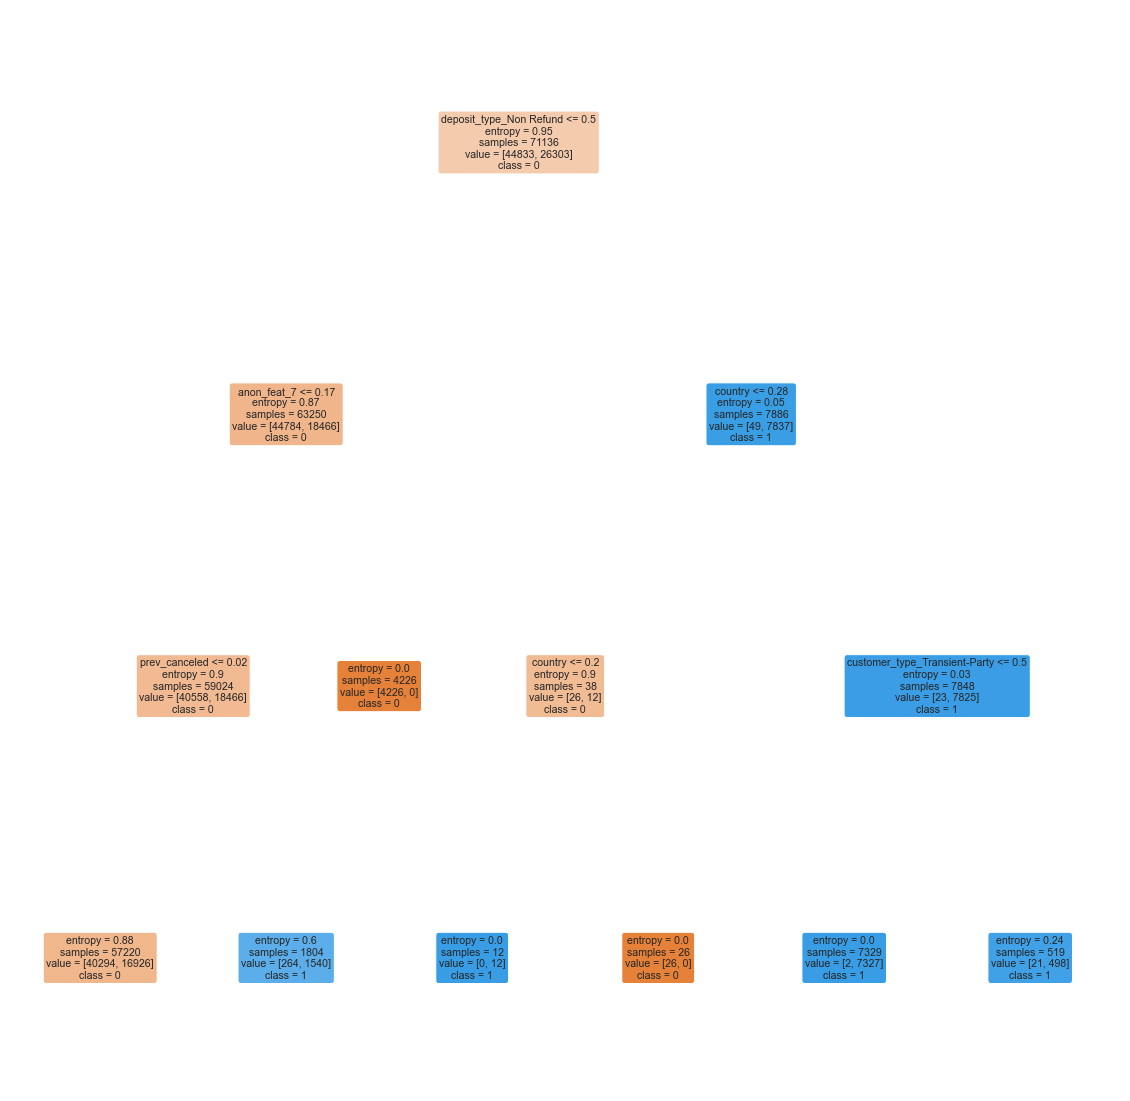

In [83]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
dot_data  = plot_tree(clf, 
                    feature_names = X_train.columns,
                    class_names = ["0","1"],
                    rounded = True, proportion = False, impurity = True,
                    label='all', precision = 2, filled = True) 
